In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df1=df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_9332\2177195685.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


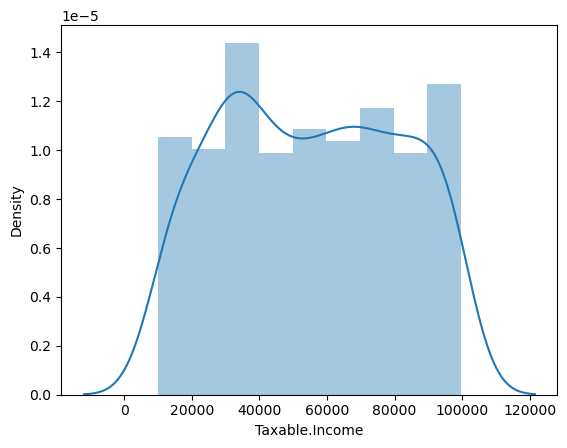

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_9332\2177195685.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


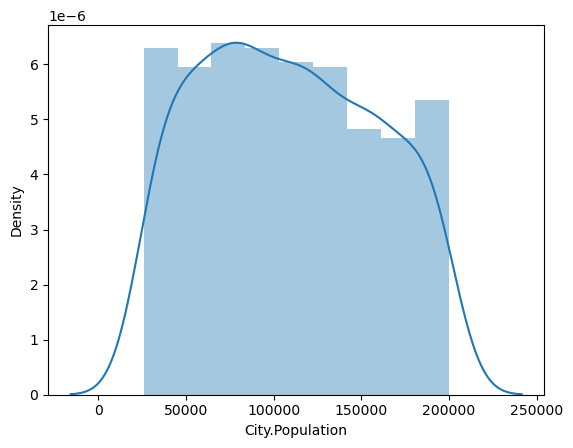

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_9332\2177195685.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


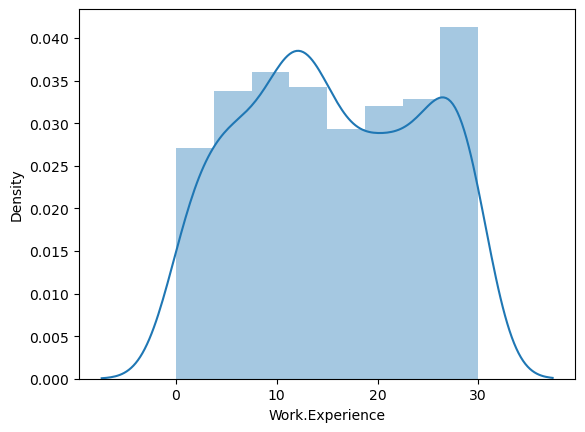

In [8]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.distplot(df[i])
        plt.show()

In [10]:
df.duplicated().any()

False

In [11]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [12]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


Taxable.Income


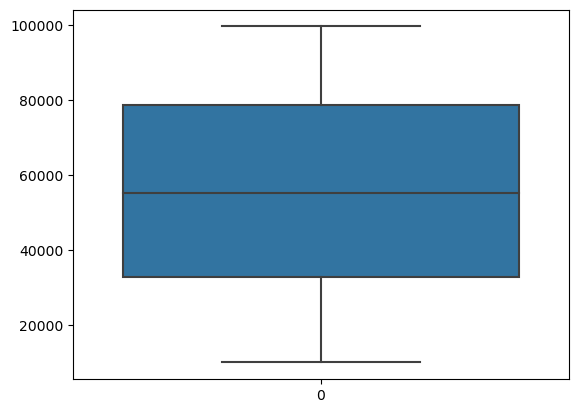

City.Population


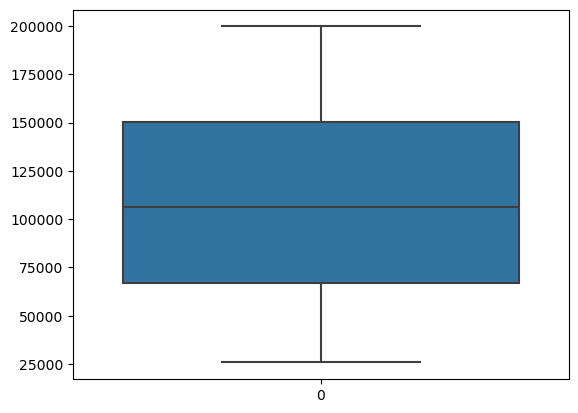

Work.Experience


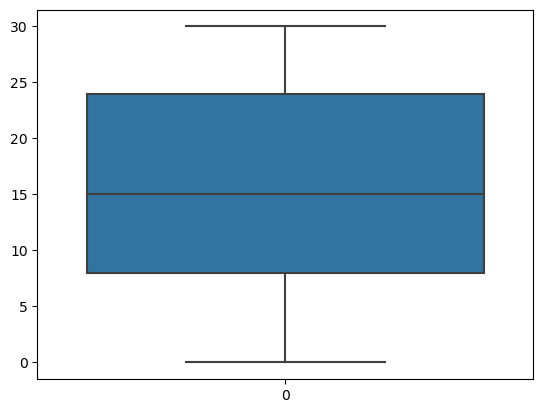

In [13]:
for i in df.columns:
    if df[i].dtype!='object':
        print(i)
        sns.boxplot(df[i])
        plt.show()

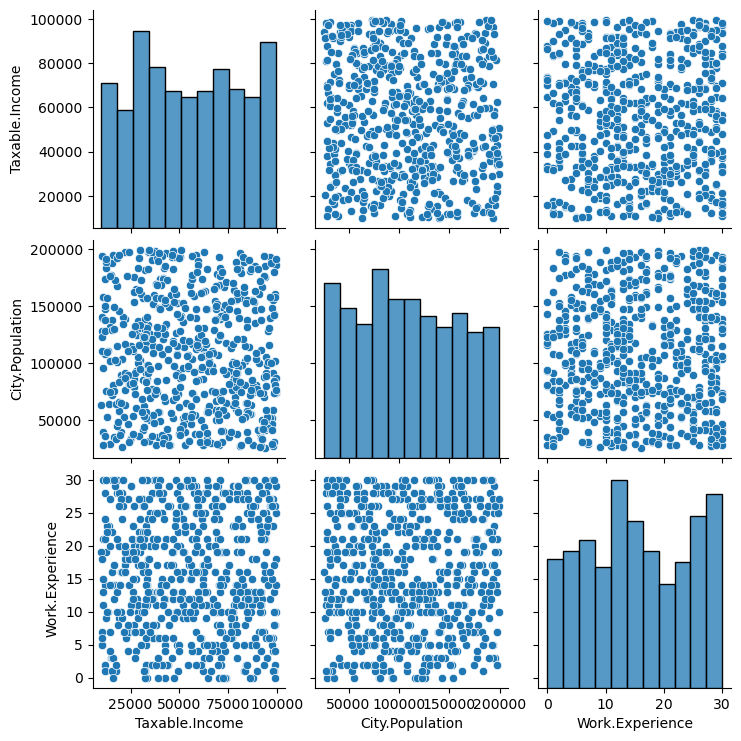

In [14]:
sns.pairplot(df)

In [15]:
df['Taxable.Income'].min()

10003

In [16]:
df['Taxable.Income'].max()

99619

In [20]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1=df.copy()
df1['taxable_category'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [21]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Undergrad         600 non-null    object  
 1   Marital.Status    600 non-null    object  
 2   Taxable.Income    600 non-null    int64   
 3   City.Population   600 non-null    int64   
 4   Work.Experience   600 non-null    int64   
 5   Urban             600 non-null    object  
 6   taxable_category  600 non-null    category
dtypes: category(1), int64(3), object(3)
memory usage: 29.0+ KB


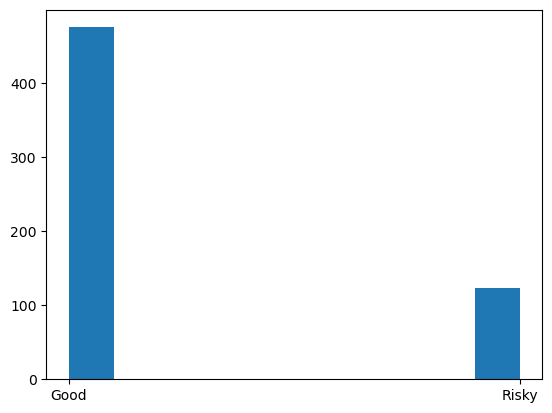

In [24]:
plt.hist(df1['taxable_category'])
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [54]:
df2=df1.copy()
for i in df2.columns:
    if df2[i].dtype!='int64':
        df2[i]=le.fit_transform(df2[i])
df2.sample(7)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
289,0,2,81231,196816,14,0,0
294,1,2,98933,74074,2,0,0
120,1,2,52022,135886,11,1,0
200,1,2,61906,162777,17,1,0
114,0,2,21945,197934,7,0,1
481,1,2,62998,120012,13,0,0
384,1,1,68533,147346,25,0,0


In [56]:
df3=df2.drop('Taxable.Income',axis=1)
df3.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [57]:
X=df3.iloc[:,:-1]
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [58]:
y=df3['taxable_category']
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: taxable_category, Length: 600, dtype: int32

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()

In [85]:
 X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=100)

In [86]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
model=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=4)

In [107]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [108]:
model.score(X_test,y_test)

0.8083333333333333

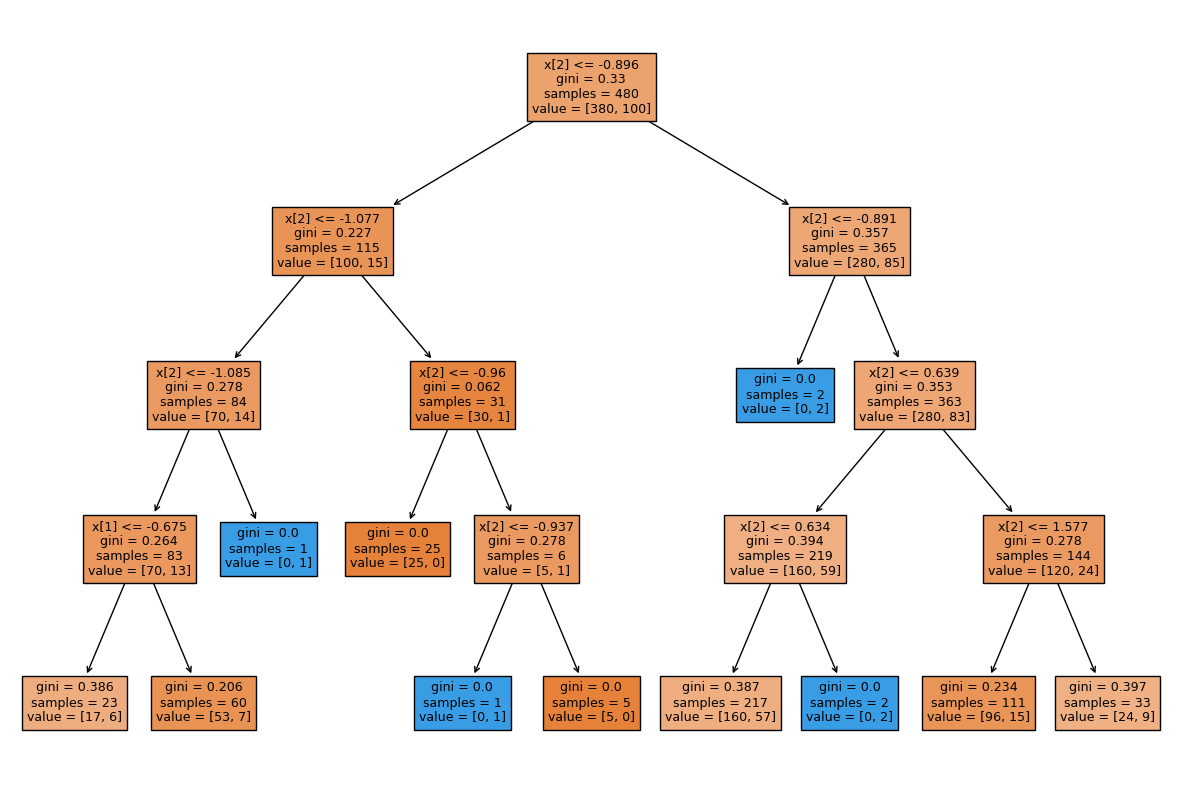

In [109]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [110]:
model.score(X_train,y_train)

0.8041666666666667

In [95]:
params={'criterion':['gini', 'entropy'],'splitter':['best', 'random']}

In [96]:
from sklearn.model_selection import GridSearchCV

In [98]:
gsv=GridSearchCV(model,param_grid=params)

In [100]:
gsv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [101]:
gsv.best_params_

{'criterion': 'gini', 'splitter': 'random'}